C:\Users\sawamoto24\sawamoto24\master\microplastic\data\MPs_15cm_20250826\MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.tiff


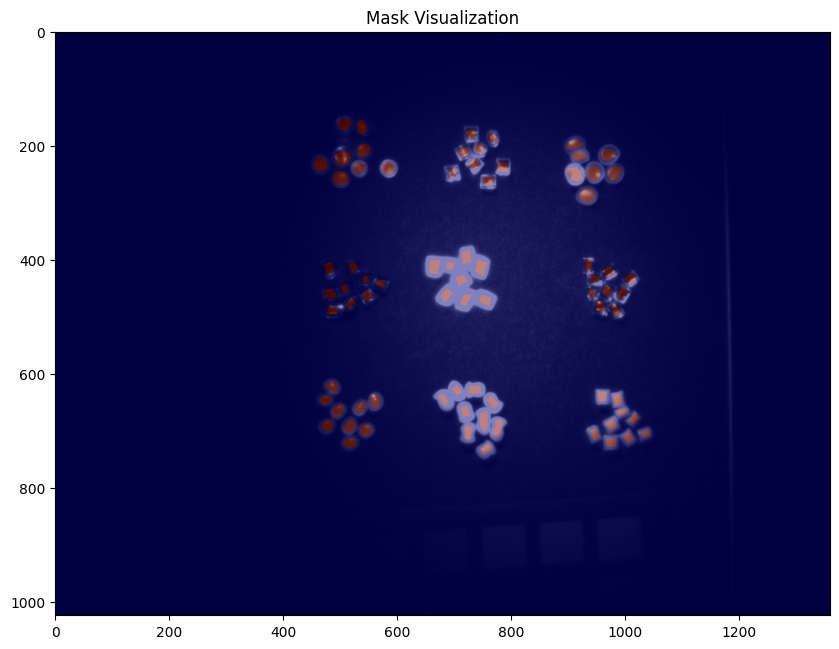

In [2]:
import numpy as np
import labelme
import matplotlib.pyplot as plt
from PIL import Image
import json
from pathlib import Path

# プロジェクトのメインディレクトリ
main_dir = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826")

# 画像とJSONファイルのパス
json_path = main_dir / "MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.json"
image_path = main_dir / "MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.tiff"
# JSONファイルを読み込む
with open(json_path, 'r') as f:
    data = json.load(f)

print(image_path)

# 画像を読み込む
img = np.asarray(Image.open(image_path))

# label_name_to_value を作成
label_name_to_value = {"_background_": 0}  # 背景は0
for shape in data["shapes"]:
    label_name = shape["label"]
    if label_name not in label_name_to_value:
        label_name_to_value[label_name] = len(label_name_to_value)

# マスクを生成（新しいAPI）
lbl, _ = labelme.utils.shapes_to_label(
    img_shape=img.shape,
    shapes=data["shapes"],
    label_name_to_value=label_name_to_value
)

# マスクを可視化
mask = (lbl > 0)

plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('Mask Visualization')
plt.show()


In [3]:
import numpy as np
import labelme
import json
from PIL import Image
from pathlib import Path

# プロジェクトのメインディレクトリとファイル名を指定
main_dir = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826")
file_stem = "MPs_15cm_20250826_Ex-1_Em-1_ET300_step1"

json_path = main_dir / (file_stem + ".json")
image_path = main_dir / (file_stem + ".tiff")

# JSONファイルを読み込む
with open(json_path, 'r') as f:
    data = json.load(f)

# ラベル名と数値の対応辞書を作成
labels = sorted(list(set(shape['label'] for shape in data['shapes'])))
label_name_to_value = {label: i for i, label in enumerate(labels, start=1)}
label_name_to_value['_background_'] = 0

# 画像を読み込む
img = np.asarray(Image.open(image_path))

# マスクを生成
lbl, _ = labelme.utils.shapes_to_label(img.shape, data['shapes'], label_name_to_value)

# 各ラベルごとに画素値を抽出し、統計量を算出
results = {}
for label_name, value in label_name_to_value.items():
    if label_name == '_background_':
        continue
    
    # ラベルに対応するマスクを作成
    label_mask = (lbl == value)
    pixel_values = img[label_mask]
    
    if len(pixel_values) > 0:
        results[label_name] = {
            'pixel_count': len(pixel_values),
            'mean': np.mean(pixel_values),
            'std_dev': np.std(pixel_values),
            'max_value': np.max(pixel_values),
            'min_value': np.min(pixel_values)
        }
    else:
        results[label_name] = "No pixels found for this label."

# 結果を整形して表示
for label, stats in results.items():
    print(f'--- ラベル: {label} ---')
    if isinstance(stats, str):
        print(stats)
    else:
        print(f'画素数: {stats["pixel_count"]}')
        print(f'平均値: {stats["mean"]}')
        print(f'標準偏差: {stats["std_dev"]}')
        print(f'最大値: {stats["max_value"]}')
        print(f'最小値: {stats["min_value"]}')
    print('-------------------------')

--- ラベル: ABS ---
画素数: 1912
平均値: 47374.319037656904
標準偏差: 11796.32252526067
最大値: 65535
最小値: 20274
-------------------------
--- ラベル: HDPE ---
画素数: 2308
平均値: 64694.78986135182
標準偏差: 2664.7334338415044
最大値: 65535
最小値: 46440
-------------------------
--- ラベル: LDPE ---
画素数: 2966
平均値: 19283.9979770735
標準偏差: 7369.795610178189
最大値: 65535
最小値: 9893
-------------------------
--- ラベル: PC ---
画素数: 2044
平均値: 21737.013698630137
標準偏差: 14260.936739899696
最大値: 65535
最小値: 7910
-------------------------
--- ラベル: PET ---
画素数: 2282
平均値: 65535.0
標準偏差: 0.0
最大値: 65535
最小値: 65535
-------------------------
--- ラベル: PMMA ---
画素数: 1818
平均値: 8286.800330033004
標準偏差: 4346.496300653556
最大値: 34750
最小値: 2542
-------------------------
--- ラベル: PP ---
画素数: 2971
平均値: 37934.12251767082
標準偏差: 14983.94096502273
最大値: 65535
最小値: 15295
-------------------------
--- ラベル: PS ---
画素数: 1905
平均値: 41915.351706036745
標準偏差: 16466.01969698824
最大値: 65535
最小値: 10099
-------------------------
--- ラベル: PVC ---
画素数: 3440
平均値: 15668.159302325

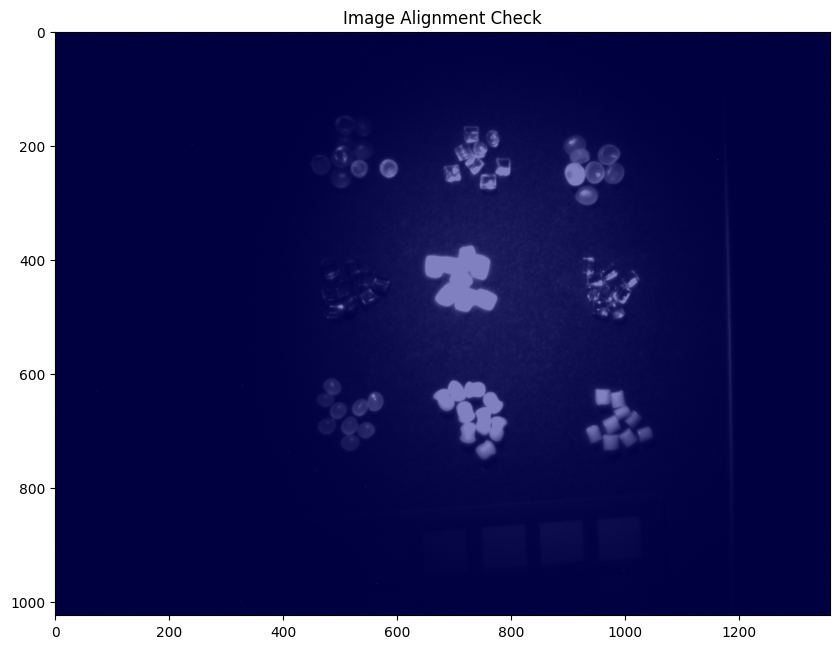

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# 画像ファイルのパスを指定してください
# 基準画像のパス
reference_image_path = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826/MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.tiff")
# 比較したい分光画像のパス（例）
spectral_image_path = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826/MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff")

# 画像を読み込み
try:
    ref_img = np.asarray(Image.open(reference_image_path))
    spec_img = np.asarray(Image.open(spectral_image_path))
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("ファイルパスを確認してください。")
    exit()

# 画像のサイズを確認
if ref_img.shape != spec_img.shape:
    print("Error: 画像のサイズが異なります。")
    exit()

# 画像を重ねて表示
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(ref_img, cmap='gray', alpha=1.0) # 基準画像を背景に表示
ax.imshow(spec_img, cmap='jet', alpha=0.5) # 分光画像を半透明で重ねて表示
ax.set_title('Image Alignment Check')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from skimage.registration import phase_cross_correlation

# 画像ファイルのパスを指定
reference_image_path = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826/MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.tiff")
spectral_image_path = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826/MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff")

# 画像を読み込み
try:
    ref_img = np.asarray(Image.open(reference_image_path))
    spec_img = np.asarray(Image.open(spectral_image_path))
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("ファイルパスを確認してください。")
    exit()

# 画像のサイズを確認
if ref_img.shape != spec_img.shape:
    print("Error: 画像のサイズが異なります。")
    exit()

# 位相相関法でずれを計算
# output: ずれの量 (y, x), 誤差, 位相相関のピーク
shift, error, phase = phase_cross_correlation(ref_img, spec_img)

# ずれの量（ピクセル単位）を表示
print(f'基準画像に対する分光画像のずれ:')
print(f'  y方向 (縦): {shift[0]:.2f} ピクセル')
print(f'  x方向 (横): {shift[1]:.2f} ピクセル')
print(f'  誤差: {error:.4f}')

# ずれが非常に小さい（0に近い）ことを確認し、問題ないと判断
if np.sqrt(shift[0]**2 + shift[1]**2) < 1.0:
    print("\n画像間のずれは1ピクセル未満です。位置合わせは正確であると考えられます。")
else:
    print("\n画像間にずれがある可能性があります。再撮影または画像補正を検討してください。")

基準画像に対する分光画像のずれ:
  y方向 (縦): -78.00 ピクセル
  x方向 (横): -590.00 ピクセル
  誤差: 1.0000

画像間にずれがある可能性があります。再撮影または画像補正を検討してください。


---

## 修正版　学習モデル

In [6]:
import pandas as pd
import numpy as np
import labelme
import json
from PIL import Image
from pathlib import Path
import re

# --- ユーザーが設定する項目 ---
main_dir = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826")
reference_file_stem = "MPs_15cm_20250826_Ex-1_Em-1_ET300_step1"
# ------------------------------

# 1. 基準JSONファイルを読み込む
json_path = main_dir / (reference_file_stem + ".json")
print(f"Loading reference JSON file from: {json_path}")
try:
    with open(json_path, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Error: JSONファイルが見つかりません。パスを確認してください。")
    exit()

labels = sorted(list(set(shape['label'] for shape in data['shapes'])))
label_name_to_value = {label: i for i, label in enumerate(labels, start=1)}
label_name_to_value['_background_'] = 0

all_results = []
wavelength_pattern = re.compile(r'Ex(\d+)_Em(\d+)')

# 2. フォルダ内の分光画像ファイルだけを対象にループ処理
image_files = list(main_dir.glob("*Ex*_Em*.tiff"))
image_files = [f for f in image_files if '-1-Em-1-' not in f.stem]

if not image_files:
    print("Error: 指定されたパターンに一致する分光画像ファイルが見つかりません。")
    exit()

print(f"\nFound {len(image_files)} spectral image files to process.")

# 各プラスチック片にユニークなIDを付与
shapes_with_ids = [{**shape, 'id': f"{shape['label']}_{idx}"} for idx, shape in enumerate(data['shapes'])]

for image_path in image_files:
    try:
        match = wavelength_pattern.search(image_path.name)
        if not match:
            print(f"Warning: Wavelength pattern not found in {image_path.name}. Skipping.")
            continue
        ex_wavelength = int(match.group(1))
        em_wavelength = int(match.group(2))

        img = np.asarray(Image.open(image_path))
        lbl, _ = labelme.utils.shapes_to_label(img.shape, data['shapes'], label_name_to_value)
        
        # 各プラスチック片（shape）ごとに処理
        for shape_obj in shapes_with_ids:
            label_name = shape_obj['label']
            shape_id = shape_obj['id']
            label_value = label_name_to_value[label_name]
            
            # マスクを作成
            shape_mask = (lbl == label_value)

            pixel_values = img[shape_mask]

            if len(pixel_values) > 0:
                result = {
                    'image_name': image_path.name,
                    'label': label_name,
                    'shape_id': shape_id,
                    'Ex_wavelength': ex_wavelength,
                    'Em_wavelength': em_wavelength,
                    'pixel_count': len(pixel_values),
                    'mean': np.mean(pixel_values),
                    'std_dev': np.std(pixel_values),
                    'max_value': np.max(pixel_values),
                    'min_value': np.min(pixel_values)
                }
                all_results.append(result)
    except Exception as e:
        print(f"Warning: Failed to process {image_path.name}. Reason: {e}")
        continue

# 3. すべての結果をデータフレームに整理し、CSVとして保存
if all_results:
    df = pd.DataFrame(all_results)
    output_csv_path = main_dir / "combined_spectral_features_with_ids.csv"
    df.to_csv(output_csv_path, index=False)
    print(f'\n全分光データの統合データセットが作成されました: {output_csv_path}')
    print('\nデータセットのプレビュー:')
    print(df.head())
else:
    print("Warning: No data was successfully processed. Check your files and paths.")

Loading reference JSON file from: C:\Users\sawamoto24\sawamoto24\master\microplastic\data\MPs_15cm_20250826\MPs_15cm_20250826_Ex-1_Em-1_ET300_step1.json

Found 107 spectral image files to process.

全分光データの統合データセットが作成されました: C:\Users\sawamoto24\sawamoto24\master\microplastic\data\MPs_15cm_20250826\combined_spectral_features_with_ids.csv

データセットのプレビュー:
                                         image_name label shape_id  \
0  MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff   PET    PET_0   
1  MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff   PET    PET_1   
2  MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff   PET    PET_2   
3  MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff   PET    PET_3   
4  MPs_15cm_20250826_Ex260_Em280_ET20000_step1.tiff   PET    PET_4   

   Ex_wavelength  Em_wavelength  pixel_count         mean    std_dev  \
0            260            280         2282  1086.907975  94.404445   
1            260            280         2282  1086.907975  94.404445   
2          

In [7]:
import pandas as pd
from pathlib import Path

# 作成された統合データセットのパスを指定
main_dir = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826")
output_csv_path = main_dir / "combined_spectral_features_with_ids.csv"

# データセットを読み込み
try:
    df = pd.read_csv(output_csv_path)
except FileNotFoundError:
    print(f"Error: {output_csv_path} が見つかりません。")
    exit()

# 'mean'値の列名を 'Ex' と 'Em' の波長情報を使って動的に作成
df['feature_name'] = 'mean_' + 'Ex' + df['Ex_wavelength'].astype(str) + '_Em' + df['Em_wavelength'].astype(str)

# 不要な列を削除
df_pivot = df.drop(columns=['Ex_wavelength', 'Em_wavelength', 'image_name', 'pixel_count', 'std_dev', 'max_value', 'min_value'])

# pivot_tableを使ってデータを「横長」に変換
# indexに 'shape_id' と 'label' を指定して、各プラスチック片をユニークな行として扱う
df_profile = df_pivot.pivot_table(
    index=['shape_id', 'label'],
    columns='feature_name',
    values='mean',
    aggfunc='mean'
).reset_index()

# 欠損値があれば0で埋める
df_profile = df_profile.fillna(0)

# 新しいデータセットをCSVファイルとして保存
profile_csv_path = main_dir / "spectral_profiles_per_piece.csv"
df_profile.to_csv(profile_csv_path, index=False)

print(f'プラスチック片ごとの分光プロファイルデータセットが作成されました: {profile_csv_path}')
print('\nデータセットのプレビュー:')
print(df_profile.head())

プラスチック片ごとの分光プロファイルデータセットが作成されました: C:\Users\sawamoto24\sawamoto24\master\microplastic\data\MPs_15cm_20250826\spectral_profiles_per_piece.csv

データセットのプレビュー:
feature_name shape_id label  mean_Ex260_Em280  mean_Ex260_Em300  \
0              ABS_41   ABS       1077.160042       1076.622385   
1              ABS_42   ABS       1077.160042       1076.622385   
2              ABS_43   ABS       1077.160042       1076.622385   
3              ABS_44   ABS       1077.160042       1076.622385   
4              ABS_45   ABS       1077.160042       1076.622385   

feature_name  mean_Ex260_Em320  mean_Ex260_Em340  mean_Ex260_Em360  \
0                  1075.529812        1077.39749       2973.840481   
1                  1075.529812        1077.39749       2973.840481   
2                  1075.529812        1077.39749       2973.840481   
3                  1075.529812        1077.39749       2973.840481   
4                  1075.529812        1077.39749       2973.840481   

feature_name  mean_Ex

--- 精度評価レポート（正しい分割による評価） ---
              precision    recall  f1-score   support

         ABS       1.00      1.00      1.00         3
        HDPE       1.00      1.00      1.00         3
        LDPE       1.00      1.00      1.00         3
          PC       1.00      1.00      1.00         3
         PET       1.00      1.00      1.00         2
        PMMA       1.00      1.00      1.00         3
          PP       1.00      1.00      1.00         2
          PS       1.00      1.00      1.00         2
         PVC       1.00      1.00      1.00         2

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



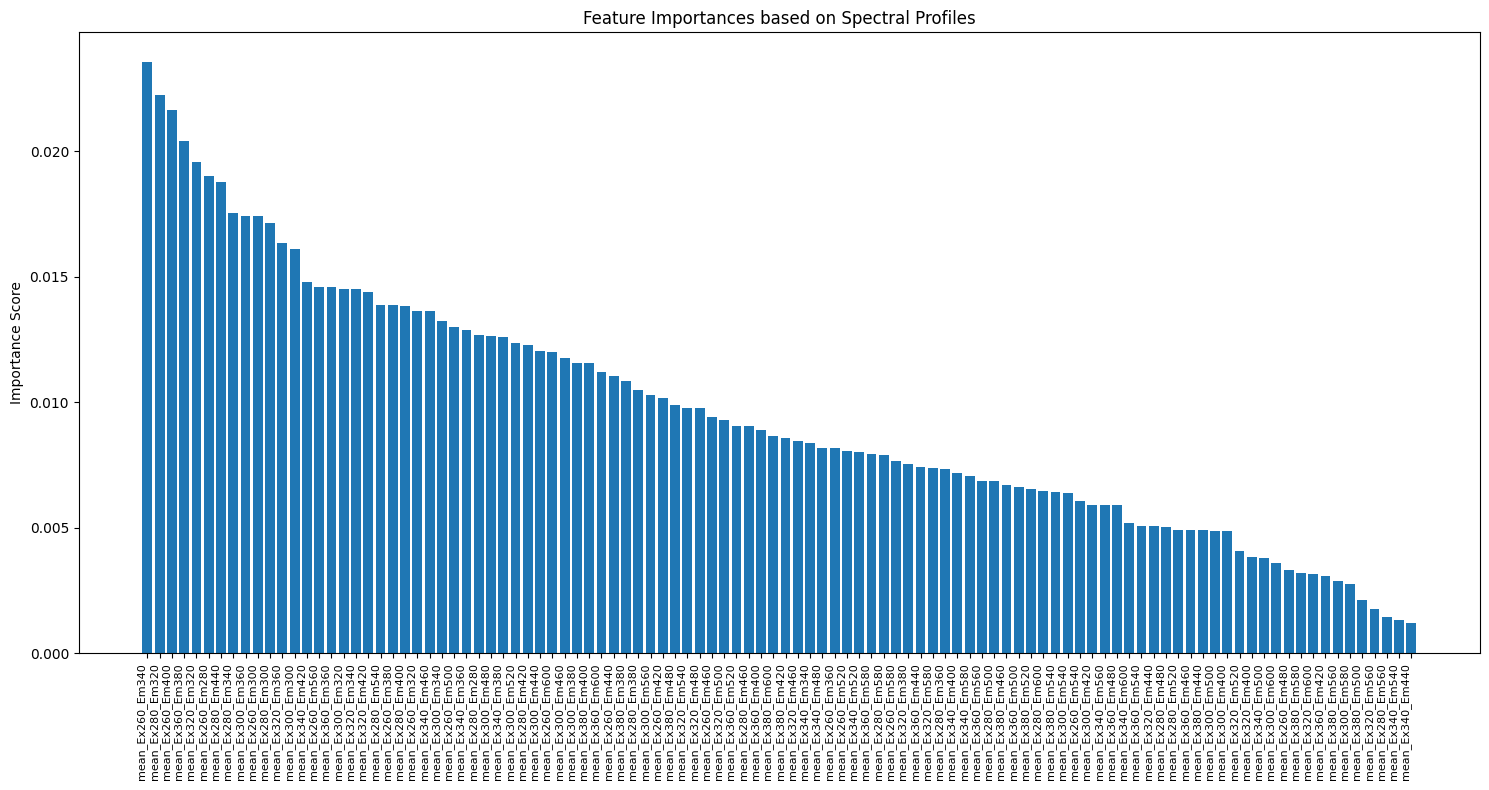


特徴量の重要度ランキング（トップ10）:
             feature  importance
3   mean_Ex260_Em340    0.023555
19  mean_Ex280_Em320    0.022220
6   mean_Ex260_Em400    0.021650
80  mean_Ex360_Em380    0.020421
50  mean_Ex320_Em320    0.019574
0   mean_Ex260_Em280    0.018995
25  mean_Ex280_Em440    0.018766
20  mean_Ex280_Em340    0.017543
37  mean_Ex300_Em360    0.017430
1   mean_Ex260_Em300    0.017410


In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 作成された分光プロファイルデータセットのパスを指定
main_dir = Path("C:/Users/sawamoto24/sawamoto24/master/microplastic/data/MPs_15cm_20250826")
profile_csv_path = main_dir / "spectral_profiles_per_piece.csv"

# データセットを読み込み
try:
    df_profile = pd.read_csv(profile_csv_path)
except FileNotFoundError:
    print(f"Error: {profile_csv_path} が見つかりません。")
    exit()

# ラベルとshape_idのユニークな組み合わせを取得し、これを分割
unique_samples = df_profile[['shape_id', 'label']].drop_duplicates()

# 訓練用とテスト用に分割
# ここでは、プラスチックの種類ごとにサンプルを均等に分割
X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(
    unique_samples['shape_id'],
    unique_samples['label'],
    test_size=0.3,
    random_state=42,
    stratify=unique_samples['label']
)

# 分割したサンプルIDを使って、元のデータフレームから訓練・テストデータを抽出
X_train = df_profile[df_profile['shape_id'].isin(X_train_samples)].drop(columns=['shape_id', 'label'])
y_train = df_profile[df_profile['shape_id'].isin(X_train_samples)]['label']
X_test = df_profile[df_profile['shape_id'].isin(X_test_samples)].drop(columns=['shape_id', 'label'])
y_test = df_profile[df_profile['shape_id'].isin(X_test_samples)]['label']


# RandomForestClassifierモデルを初期化し、学習
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# テストデータに対する予測を実行
y_pred = model.predict(X_test)

# 精度評価レポートを表示
print('--- 精度評価レポート（正しい分割による評価） ---')
print(classification_report(y_test, y_pred))

# 特徴量の重要度を取得
feature_importances = model.feature_importances_
feature_names = X_train.columns

# 重要度をデータフレームに整理し、重要度が高い順に並べる
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# 重要度を可視化
plt.figure(figsize=(15, 8))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.title('Feature Importances based on Spectral Profiles')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n特徴量の重要度ランキング（トップ10）:")
print(importance_df.head(10))

---